<a href="https://colab.research.google.com/github/Bishalroybd/Neural-net/blob/main/Diabetic_Retinopathy_csl_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, shutil
import cv2
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [5]:
! pip install kaggle

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
! mkdir ~/.kaggle

In [8]:
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [9]:
! chmod 600 ~/.kaggle/kaggle.json

# APTOS DOWNLOAD


In [11]:
! kaggle datasets download sovitrath/diabetic-retinopathy-224x224-gaussian-filtered

Dataset URL: https://www.kaggle.com/datasets/sovitrath/diabetic-retinopathy-224x224-gaussian-filtered
License(s): CC0-1.0
 99% 424M/427M [00:06<00:00, 16.1MB/s]
100% 427M/427M [00:07<00:00, 60.3MB/s]


In [12]:
import zipfile
import os

# 1. Create the 'APTOS' folder if it doesn't exist
aptos_folder = '/content/APTOS'  # Define the path for the new folder
os.makedirs(aptos_folder, exist_ok=True)  # Create the folder

# 2. Define the path to the zip file
zip_file_path = '/content/diabetic-retinopathy-224x224-gaussian-filtered.zip'

# 3. Create a ZipFile object
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # 4. Extract all contents to the 'APTOS' folder
    zip_ref.extractall(aptos_folder)

print(f"Files extracted to: {aptos_folder}")

Files extracted to: /content/APTOS


In [13]:
import os

def list_folders(path):
  for root, dirs, files in os.walk(path):
    for dir_name in dirs:
      if not any(dir_name.lower().endswith(ext) for ext in ['.png', '.jpg']):
        print(os.path.join(root, dir_name))

list_folders('/content/APTOS')


/content/APTOS/gaussian_filtered_images
/content/APTOS/gaussian_filtered_images/gaussian_filtered_images
/content/APTOS/gaussian_filtered_images/gaussian_filtered_images/No_DR
/content/APTOS/gaussian_filtered_images/gaussian_filtered_images/Moderate
/content/APTOS/gaussian_filtered_images/gaussian_filtered_images/Mild
/content/APTOS/gaussian_filtered_images/gaussian_filtered_images/Proliferate_DR
/content/APTOS/gaussian_filtered_images/gaussian_filtered_images/Severe


In [14]:
import os

def count_images(directory):
  """Counts the number of image files in a given directory and its subdirectories.

  Args:
    directory: The path to the directory to search.

  Returns:
    The total number of image files found.
  """
  image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp')  # Add more if needed
  image_count = 0
  for root, _, files in os.walk(directory):
    for file in files:
      if file.lower().endswith(image_extensions):
        image_count += 1
  return image_count

# Example usage (assuming your images are in /content/APTOS):
aptos_image_count = count_images('/content/APTOS')
print(f"Total number of images found in /content/APTOS: {aptos_image_count}")


Total number of images found in /content/APTOS: 3662


# IDRID DOWNLOAD

In [16]:
! kaggle datasets download aaryapatel98/indian-diabetic-retinopathy-image-dataset

Dataset URL: https://www.kaggle.com/datasets/aaryapatel98/indian-diabetic-retinopathy-image-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
100% 408M/408M [00:02<00:00, 117MB/s]
100% 408M/408M [00:02<00:00, 149MB/s]


In [17]:
import zipfile
import os

# 1. Create the IDRID folder if it doesn't exist
idrid_folder = '/content/IDRID'
os.makedirs(idrid_folder, exist_ok=True)

# 2. Define the path to the zip file
zip_file_path = '/content/indian-diabetic-retinopathy-image-dataset.zip'

# 3. Create a ZipFile object
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # 4. Extract all contents to the IDRID folder
    zip_ref.extractall(idrid_folder)

print(f"Files extracted to: {idrid_folder}")

Files extracted to: /content/IDRID


In [18]:
# IDRID
import os

IDRID_dir = "/content/IDRID"

print("Files in IDRID directory:", os.listdir(IDRID_dir))


Files in IDRID directory: ['B.%20Disease%20Grading', 'C.%20Localization', 'A.%20Segmentation']


In [19]:
def list_folders(path):
  for root, dirs, files in os.walk(path):
    for dir_name in dirs:
      if not any(dir_name.lower().endswith(ext) for ext in ['.png', '.jpg']):
        print(os.path.join(root, dir_name))

list_folders('/content/IDRID')


/content/IDRID/B.%20Disease%20Grading
/content/IDRID/C.%20Localization
/content/IDRID/A.%20Segmentation
/content/IDRID/B.%20Disease%20Grading/B. Disease Grading
/content/IDRID/B.%20Disease%20Grading/B. Disease Grading/2. Groundtruths
/content/IDRID/B.%20Disease%20Grading/B. Disease Grading/1. Original Images
/content/IDRID/B.%20Disease%20Grading/B. Disease Grading/1. Original Images/a. Training Set
/content/IDRID/B.%20Disease%20Grading/B. Disease Grading/1. Original Images/b. Testing Set
/content/IDRID/C.%20Localization/C. Localization
/content/IDRID/C.%20Localization/C. Localization/2. Groundtruths
/content/IDRID/C.%20Localization/C. Localization/1. Original Images
/content/IDRID/C.%20Localization/C. Localization/2. Groundtruths/2. Fovea Center Location
/content/IDRID/C.%20Localization/C. Localization/2. Groundtruths/1. Optic Disc Center Location
/content/IDRID/C.%20Localization/C. Localization/1. Original Images/a. Training Set
/content/IDRID/C.%20Localization/C. Localization/1. Orig

In [20]:
import os

def count_images_per_folder(root_dir):
  """Counts images in each subfolder and provides a total count.
  """
  total_images = 0
  for dirpath, dirnames, filenames in os.walk(root_dir):
    image_count = sum(1 for f in filenames if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')))
    if image_count > 0:
      print(f"Folder: {dirpath}, Image Count: {image_count}")
      total_images += image_count
  print(f"\nTotal images in {root_dir}: {total_images}")

# Example usage for APTOS dataset
count_images_per_folder('/content/APTOS')

# Example usage for IDRID dataset
count_images_per_folder('/content/IDRID')


Folder: /content/APTOS/gaussian_filtered_images/gaussian_filtered_images/No_DR, Image Count: 1805
Folder: /content/APTOS/gaussian_filtered_images/gaussian_filtered_images/Moderate, Image Count: 999
Folder: /content/APTOS/gaussian_filtered_images/gaussian_filtered_images/Mild, Image Count: 370
Folder: /content/APTOS/gaussian_filtered_images/gaussian_filtered_images/Proliferate_DR, Image Count: 295
Folder: /content/APTOS/gaussian_filtered_images/gaussian_filtered_images/Severe, Image Count: 193

Total images in /content/APTOS: 3662
Folder: /content/IDRID/B.%20Disease%20Grading/B. Disease Grading/1. Original Images/a. Training Set, Image Count: 413
Folder: /content/IDRID/B.%20Disease%20Grading/B. Disease Grading/1. Original Images/b. Testing Set, Image Count: 103
Folder: /content/IDRID/C.%20Localization/C. Localization/1. Original Images/a. Training Set, Image Count: 413
Folder: /content/IDRID/C.%20Localization/C. Localization/1. Original Images/b. Testing Set, Image Count: 103
Folder: /c

# DRIVE DOWNLOAD

In [22]:
! kaggle datasets download andrewmvd/drive-digital-retinal-images-for-vessel-extraction

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/drive-digital-retinal-images-for-vessel-extraction
License(s): other
 96% 27.0M/28.0M [00:00<00:00, 43.0MB/s]
100% 28.0M/28.0M [00:00<00:00, 47.6MB/s]


In [23]:
# Dataset
import zipfile

z = zipfile.ZipFile('/content/drive-digital-retinal-images-for-vessel-extraction.zip')

z.extractall()

In [24]:
# DRIVE
import os

DRIVE_dir = "/content/DRIVE"

print("Files in DRIVE:", os.listdir(DRIVE_dir))

Files in DRIVE: ['training', 'test']


In [25]:
def list_folders(path):
  for root, dirs, files in os.walk(path):
    for dir_name in dirs:
      if not any(dir_name.lower().endswith(ext) for ext in ['.png', '.jpg']):
        print(os.path.join(root, dir_name))

list_folders('/content/DRIVE')


/content/DRIVE/training
/content/DRIVE/test
/content/DRIVE/training/1st_manual
/content/DRIVE/training/mask
/content/DRIVE/training/images
/content/DRIVE/test/mask
/content/DRIVE/test/images


# STARE DOWNLOAD

In [27]:
!mkdir -p /content/STARE


In [28]:
import os

# Create subfolders
os.makedirs("/content/STARE/images", exist_ok=True)
os.makedirs("/content/STARE/labels_ah", exist_ok=True)
os.makedirs("/content/STARE/labels_vk", exist_ok=True)

# Extract files into subfolders
!tar -xvf "/content/drive/MyDrive/Stare /stare-images.tar" -C "/content/STARE/images"
!tar -xvf "/content/drive/MyDrive/Stare /labels-ah.tar" -C "/content/STARE/labels_ah"
!tar -xvf "/content/drive/MyDrive/Stare /labels-vk.tar" -C "/content/STARE/labels_vk"

im0001.ppm.gz
im0002.ppm.gz
im0003.ppm.gz
im0004.ppm.gz
im0005.ppm.gz
im0044.ppm.gz
im0077.ppm.gz
im0081.ppm.gz
im0082.ppm.gz
im0139.ppm.gz
im0162.ppm.gz
im0163.ppm.gz
im0235.ppm.gz
im0236.ppm.gz
im0239.ppm.gz
im0240.ppm.gz
im0255.ppm.gz
im0291.ppm.gz
im0319.ppm.gz
im0324.ppm.gz
im0001.ah.ppm.gz
im0002.ah.ppm.gz
im0003.ah.ppm.gz
im0004.ah.ppm.gz
im0005.ah.ppm.gz
im0044.ah.ppm.gz
im0077.ah.ppm.gz
im0081.ah.ppm.gz
im0082.ah.ppm.gz
im0139.ah.ppm.gz
im0162.ah.ppm.gz
im0163.ah.ppm.gz
im0235.ah.ppm.gz
im0236.ah.ppm.gz
im0239.ah.ppm.gz
im0240.ah.ppm.gz
im0255.ah.ppm.gz
im0291.ah.ppm.gz
im0319.ah.ppm.gz
im0324.ah.ppm.gz
im0001.vk.ppm.gz
im0002.vk.ppm.gz
im0003.vk.ppm.gz
im0004.vk.ppm.gz
im0005.vk.ppm.gz
im0044.vk.ppm.gz
im0077.vk.ppm.gz
im0081.vk.ppm.gz
im0082.vk.ppm.gz
im0139.vk.ppm.gz
im0162.vk.ppm.gz
im0163.vk.ppm.gz
im0235.vk.ppm.gz
im0236.vk.ppm.gz
im0239.vk.ppm.gz
im0240.vk.ppm.gz
im0255.vk.ppm.gz
im0291.vk.ppm.gz
im0319.vk.ppm.gz
im0324.vk.ppm.gz


In [29]:
import os
print("Extracted Files in STARE Directory:", os.listdir("/content/STARE"))


Extracted Files in STARE Directory: ['images', 'labels_ah', 'labels_vk']


# APTOS Pre_processing


In [30]:
import cv2
import os
import numpy as np
import gc  # Garbage collector to free RAM
from tqdm import tqdm

# Define image size
IMG_SIZE = (256, 256)  # Change to (256, 256) if needed

# Save path
SAVE_DIR = "/content/preprocessed_aptos"
os.makedirs(SAVE_DIR, exist_ok=True)

def preprocess_image(image_path, apply_clahe=True):
    """Reads an image, resizes it, normalizes pixel values, and applies CLAHE."""
    try:
        img = cv2.imread(image_path)  # Read image
        if img is None:
            print(f"⚠️ Skipping corrupt image: {image_path}")
            return None

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        img = cv2.resize(img, IMG_SIZE)  # Resize to fixed dimensions
        img = img / 255.0  # Normalize to [0,1]

        if apply_clahe:
            # Convert to LAB color space and apply CLAHE to the L-channel
            lab = cv2.cvtColor((img * 255).astype(np.uint8), cv2.COLOR_RGB2LAB)
            l, a, b = cv2.split(lab)
            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
            l = clahe.apply(l)
            lab = cv2.merge((l, a, b))
            img = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB) / 255.0  # Normalize again

        return img

    except Exception as e:
        print(f"⚠️ Error processing {image_path}: {e}")
        return None

def preprocess_dataset(directory, batch_size=500):
    """Preprocesses images in small batches and saves to disk to reduce RAM usage."""
    images = []
    filenames = []

    for category in os.listdir(directory):  # Loop through No_DR, Mild, etc.
        category_path = os.path.join(directory, category)
        if not os.path.isdir(category_path):
            continue

        save_category_path = os.path.join(SAVE_DIR, category)
        os.makedirs(save_category_path, exist_ok=True)  # Create save folder

        image_files = os.listdir(category_path)

        for i in tqdm(range(0, len(image_files), batch_size), desc=f"Processing {category} in batches"):
            batch_files = image_files[i:i+batch_size]
            batch_images = []
            batch_filenames = []

            for img_name in batch_files:
                img_path = os.path.join(category_path, img_name)
                img = preprocess_image(img_path)
                if img is not None:
                    batch_images.append(img)
                    batch_filenames.append(img_name)

            # Save batch to disk
            np.save(os.path.join(save_category_path, f"batch_{i}.npy"), np.array(batch_images))

            # Clear RAM
            del batch_images
            gc.collect()

            print(f"✅ Processed {len(batch_filenames)} images for {category} so far...")

    print(f"✅ Preprocessed images saved in {SAVE_DIR}")



In [31]:
# Process APTOS dataset in small batches
APTOS_PATH = "/content/APTOS/gaussian_filtered_images/gaussian_filtered_images"
preprocess_dataset(APTOS_PATH)


Processing No_DR in batches:  25%|██▌       | 1/4 [00:10<00:31, 10.51s/it]

✅ Processed 500 images for No_DR so far...


Processing No_DR in batches:  50%|█████     | 2/4 [00:24<00:25, 12.76s/it]

✅ Processed 500 images for No_DR so far...


Processing No_DR in batches:  75%|███████▌  | 3/4 [00:34<00:11, 11.32s/it]

✅ Processed 500 images for No_DR so far...


Processing No_DR in batches: 100%|██████████| 4/4 [00:37<00:00,  9.50s/it]


✅ Processed 305 images for No_DR so far...


Processing Moderate in batches:  50%|█████     | 1/2 [00:13<00:13, 13.84s/it]

✅ Processed 500 images for Moderate so far...


Processing Moderate in batches: 100%|██████████| 2/2 [00:23<00:00, 11.61s/it]


✅ Processed 499 images for Moderate so far...


Processing Mild in batches: 100%|██████████| 1/1 [00:05<00:00,  5.01s/it]


✅ Processed 370 images for Mild so far...


Processing Proliferate_DR in batches: 100%|██████████| 1/1 [00:04<00:00,  4.12s/it]


✅ Processed 295 images for Proliferate_DR so far...


Processing Severe in batches: 100%|██████████| 1/1 [00:02<00:00,  2.06s/it]

✅ Processed 193 images for Severe so far...
✅ Preprocessed images saved in /content/preprocessed_aptos


In [32]:
import os

print("✅ Saved Preprocessed Images:", os.listdir(SAVE_DIR))


✅ Saved Preprocessed Images: ['No_DR', 'Moderate', 'Mild', 'Proliferate_DR', 'Severe']


In [36]:
!pip install albumentations  # Install albumentations if not installed
import os
import numpy as np
import cv2
import albumentations as A
from albumentations.pytorch import ToTensorV2
from tqdm import tqdm


In [37]:
# Define augmentation pipeline
augment = A.Compose([
    A.RandomRotate90(p=0.5),      # Random 90-degree rotations
    A.HorizontalFlip(p=0.5),      # Random horizontal flips
    A.VerticalFlip(p=0.5),        # Random vertical flips
    A.RandomBrightnessContrast(p=0.2),  # Adjust brightness & contrast
    A.GaussianBlur(p=0.2),        # Apply Gaussian blur
])


In [38]:
def augment_and_save_images(preprocessed_dir):
    """Applies augmentations to preprocessed images and saves in the same directory."""

    for category in os.listdir(preprocessed_dir):  # Loop through categories (No_DR, Mild, etc.)
        category_path = os.path.join(preprocessed_dir, category)
        if not os.path.isdir(category_path):
            continue

        # Process all .npy batch files
        for file in tqdm(os.listdir(category_path), desc=f"Augmenting {category}"):
            if file.endswith(".npy"):
                batch_path = os.path.join(category_path, file)
                images = np.load(batch_path)

                for idx, img in enumerate(images):
                    # Convert from normalized format [0,1] to [0,255]
                    img_uint8 = (img * 255).astype(np.uint8)

                    # Apply augmentation
                    augmented = augment(image=img_uint8)["image"]

                    # Save in the same category folder with "aug_" prefix
                    save_path = os.path.join(category_path, f"aug_{file[:-4]}_img{idx}.jpg")
                    cv2.imwrite(save_path, cv2.cvtColor(augmented, cv2.COLOR_RGB2BGR))

                print(f"✅ Augmented images saved for {category}")

# Run augmentation (using only SAVE_DIR, no separate SAVE_AUG_DIR)
augment_and_save_images(SAVE_DIR)
print("✅ Data augmentation complete! Augmented images saved in their original folders.")

Augmenting No_DR:  25%|██▌       | 1/4 [00:04<00:14,  4.89s/it]

✅ Augmented images saved for No_DR


Augmenting No_DR:  50%|█████     | 2/4 [00:08<00:08,  4.24s/it]

✅ Augmented images saved for No_DR


Augmenting No_DR:  75%|███████▌  | 3/4 [00:11<00:03,  3.37s/it]

✅ Augmented images saved for No_DR


Augmenting No_DR: 100%|██████████| 4/4 [00:15<00:00,  3.92s/it]


✅ Augmented images saved for No_DR


Augmenting Moderate:  50%|█████     | 1/2 [00:03<00:03,  3.73s/it]

✅ Augmented images saved for Moderate


Augmenting Moderate: 100%|██████████| 2/2 [00:07<00:00,  3.71s/it]


✅ Augmented images saved for Moderate


Augmenting Mild: 100%|██████████| 1/1 [00:02<00:00,  2.68s/it]


✅ Augmented images saved for Mild


Augmenting Proliferate_DR: 100%|██████████| 1/1 [00:02<00:00,  2.29s/it]


✅ Augmented images saved for Proliferate_DR


Augmenting Severe: 100%|██████████| 1/1 [00:01<00:00,  1.33s/it]

✅ Augmented images saved for Severe
✅ Data augmentation complete! Augmented images saved in their original folders.


In [54]:
# Load and augment images
SAVE_AUG_DIR = "/content/preprocessed_aptos/augmented"
os.makedirs(SAVE_AUG_DIR, exist_ok=True)

def augment_and_save_images(preprocessed_dir, save_dir):
    """Applies augmentations to preprocessed images and saves as .jpg"""

    for category in os.listdir(preprocessed_dir):  # Loop through categories (No_DR, Mild, etc.)
        category_path = os.path.join(preprocessed_dir, category)
        save_category_path = os.path.join(save_dir, category)
        os.makedirs(save_category_path, exist_ok=True)

        # Process all .npy batch files
        for file in tqdm(os.listdir(category_path), desc=f"Augmenting {category}"):
            if file.endswith(".npy"):
                batch_path = os.path.join(category_path, file)
                images = np.load(batch_path)

                for idx, img in enumerate(images):
                    # Convert from normalized format [0,1] to [0,255]
                    img_uint8 = (img * 255).astype(np.uint8)

                    # Apply augmentation
                    augmented = augment(image=img_uint8)["image"]

                    # Save as .jpg
                    save_path = os.path.join(save_category_path, f"aug_{file}_img{idx}.jpg")
                    cv2.imwrite(save_path, cv2.cvtColor(augmented, cv2.COLOR_RGB2BGR))

                print(f"✅ Augmented images saved for {category}")

# Run augmentation
augment_and_save_images(SAVE_DIR, SAVE_AUG_DIR)
print("✅ Data augmentation complete! Augmented images saved as .jpg")


Augmenting No_DR:  25%|██▌       | 1/4 [00:04<00:14,  4.70s/it]

✅ Augmented images saved for No_DR


Augmenting No_DR:  50%|█████     | 2/4 [00:12<00:13,  6.63s/it]

✅ Augmented images saved for No_DR


Augmenting No_DR:  75%|███████▌  | 3/4 [00:15<00:05,  5.06s/it]

✅ Augmented images saved for No_DR


Augmenting No_DR: 100%|██████████| 4/4 [00:20<00:00,  5.00s/it]


✅ Augmented images saved for No_DR


Augmenting Moderate:  50%|█████     | 1/2 [00:04<00:04,  4.19s/it]

✅ Augmented images saved for Moderate


Augmenting Moderate: 100%|██████████| 2/2 [00:07<00:00,  3.86s/it]


✅ Augmented images saved for Moderate


Augmenting Mild: 100%|██████████| 1/1 [00:02<00:00,  2.59s/it]


✅ Augmented images saved for Mild


Augmenting Proliferate_DR: 100%|██████████| 1/1 [00:01<00:00,  1.93s/it]


✅ Augmented images saved for Proliferate_DR


Augmenting Severe: 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]

✅ Augmented images saved for Severe
✅ Data augmentation complete! Augmented images saved as .jpg


In [55]:
import os
import cv2
import matplotlib.pyplot as plt

# Define the path to augmented images
AUGMENTED_DIR = "/content/preprocessed_aptos/augmented"


📌 Showing samples from category: No_DR


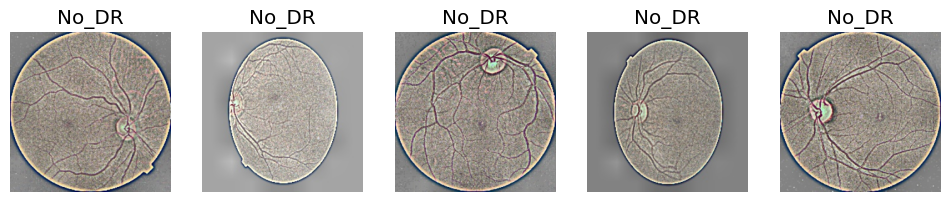

📌 Showing samples from category: Moderate


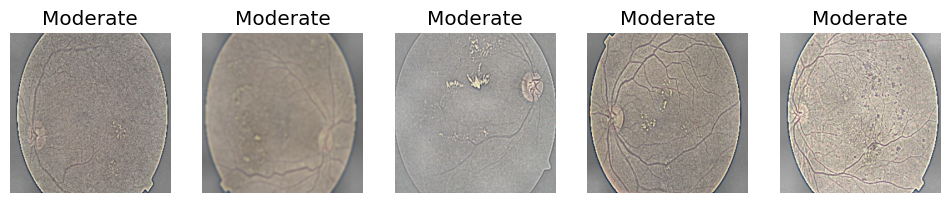

📌 Showing samples from category: Mild


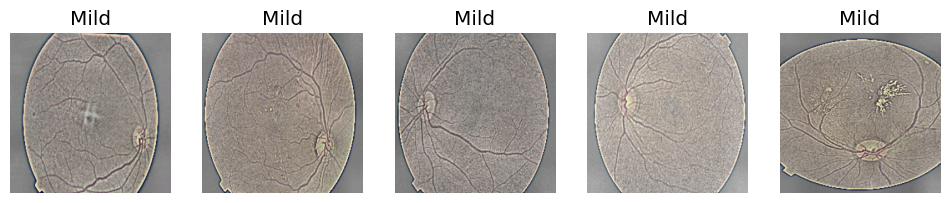

📌 Showing samples from category: Proliferate_DR


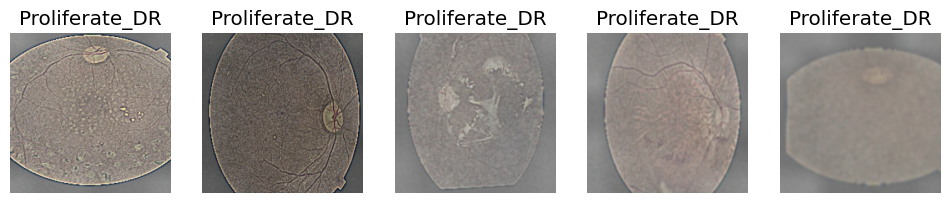

⚠️ No images found in /content/preprocessed_aptos/augmented/augmented
📌 Showing samples from category: Severe


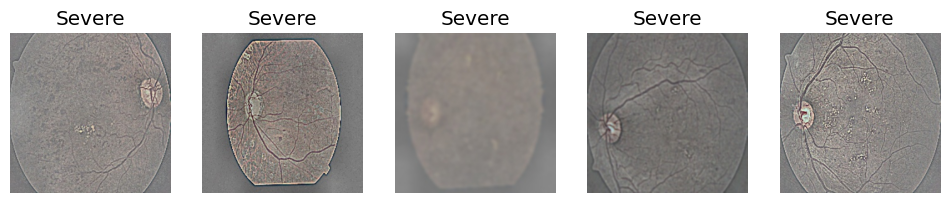

In [56]:
def show_sample_images(folder_path, num_samples=5):
    """Displays a few sample augmented images."""
    categories = os.listdir(folder_path)  # Get categories (No_DR, Mild, etc.)

    for category in categories:
        category_path = os.path.join(folder_path, category)
        images = [img for img in os.listdir(category_path) if img.endswith(".jpg")]

        if len(images) == 0:
            print(f"⚠️ No images found in {category_path}")
            continue

        print(f"📌 Showing samples from category: {category}")

        plt.figure(figsize=(12, 5))
        for i in range(min(num_samples, len(images))):
            img_path = os.path.join(category_path, images[i])
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB

            plt.subplot(1, num_samples, i+1)
            plt.imshow(img)
            plt.title(category)
            plt.axis("off")

        plt.show()

# Display sample images
show_sample_images(AUGMENTED_DIR, num_samples=5)


In [77]:


import os

def count_aptos_augmented_data(augmented_dir):
  """Counts the number of augmented images in the APTOS dataset.

  Args:
    augmented_dir: The path to the directory containing the augmented images.

  Returns:
    A dictionary where keys are categories (e.g., "No_DR") and values
    are the number of augmented images in each category.
    Returns None if the directory is invalid.
  """

  if not os.path.isdir(augmented_dir):
    print(f"Error: Directory not found: {augmented_dir}")
    return None

  image_counts = {}
  for category in os.listdir(augmented_dir):
    category_path = os.path.join(augmented_dir, category)
    if os.path.isdir(category_path):
      image_count = 0
      for filename in os.listdir(category_path):
        if filename.endswith(".jpg"):  # Assuming augmented images are .jpg
          image_count += 1
      image_counts[category] = image_count
  return image_counts

# Example usage (replace with your actual path)
AUGMENTED_DIR = "/content/preprocessed_aptos/augmented"
counts = count_aptos_augmented_data(AUGMENTED_DIR)

if counts:
  for category, count in counts.items():
    print(f"Category: {category}, Augmented Image Count: {count}")

  total_count = sum(counts.values())
  print(f"\nTotal Augmented Images: {total_count}")


Category: No_DR, Augmented Image Count: 1805
Category: Moderate, Augmented Image Count: 999
Category: Mild, Augmented Image Count: 370
Category: Proliferate_DR, Augmented Image Count: 295
Category: augmented, Augmented Image Count: 0
Category: Severe, Augmented Image Count: 193

Total Augmented Images: 3662


In [57]:
import cv2
import os
import numpy as np
import gc  # Garbage collector to free RAM
from tqdm import tqdm

# Define image size
IMG_SIZE = (256, 256)  # Change to (256, 256) if needed

# Save path
SAVE_DIR = "/content/preprocessed_idrid"
os.makedirs(SAVE_DIR, exist_ok=True)

def preprocess_image(image_path, apply_clahe=True):
    """Reads an image, resizes it, normalizes pixel values, and applies CLAHE."""
    try:
        img = cv2.imread(image_path)  # Read image
        if img is None:
            print(f"⚠️ Skipping corrupt image: {image_path}")
            return None

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        img = cv2.resize(img, IMG_SIZE)  # Resize to fixed dimensions
        img = img / 255.0  # Normalize to [0,1]

        if apply_clahe:
            # Convert to LAB color space and apply CLAHE to the L-channel
            lab = cv2.cvtColor((img * 255).astype(np.uint8), cv2.COLOR_RGB2LAB)
            l, a, b = cv2.split(lab)
            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
            l = clahe.apply(l)
            lab = cv2.merge((l, a, b))
            img = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB) / 255.0  # Normalize again

        return img

    except Exception as e:
        print(f"⚠️ Error processing {image_path}: {e}")
        return None

def preprocess_dataset(directory, batch_size=500):
    """Preprocesses images in small batches and saves to disk to reduce RAM usage."""
    images = []
    filenames = []

    for category in os.listdir(directory):  # Loop through No_DR, Mild, etc.
        category_path = os.path.join(directory, category)
        if not os.path.isdir(category_path):
            continue

        save_category_path = os.path.join(SAVE_DIR, category)
        os.makedirs(save_category_path, exist_ok=True)  # Create save folder

        image_files = os.listdir(category_path)

        for i in tqdm(range(0, len(image_files), batch_size), desc=f"Processing {category} in batches"):
            batch_files = image_files[i:i+batch_size]
            batch_images = []
            batch_filenames = []

            for img_name in batch_files:
                img_path = os.path.join(category_path, img_name)
                img = preprocess_image(img_path)
                if img is not None:
                    batch_images.append(img)
                    batch_filenames.append(img_name)

            # Save batch to disk
            np.save(os.path.join(save_category_path, f"batch_{i}.npy"), np.array(batch_images))

            # Clear RAM
            del batch_images
            gc.collect()

            print(f"✅ Processed {len(batch_filenames)} images for {category} so far...")

    print(f"✅ Preprocessed images saved in {SAVE_DIR}")


In [58]:
# Define IDRiD dataset path
IDRID_PATH = "/content/IDRID/B.%20Disease%20Grading/B. Disease Grading/1. Original Images"

# Define save path
SAVE_DIR_IDRID = "/content/preprocessed_idrid"
os.makedirs(SAVE_DIR_IDRID, exist_ok=True)

# Run preprocessing for IDRiD
preprocess_dataset(IDRID_PATH)
print(f"✅ IDRiD Preprocessing Complete! Images saved in {SAVE_DIR_IDRID}")


Processing a. Training Set in batches: 100%|██████████| 1/1 [00:54<00:00, 54.18s/it]


✅ Processed 413 images for a. Training Set so far...


Processing b. Testing Set in batches: 100%|██████████| 1/1 [00:11<00:00, 11.10s/it]

✅ Processed 103 images for b. Testing Set so far...
✅ Preprocessed images saved in /content/preprocessed_idrid
✅ IDRiD Preprocessing Complete! Images saved in /content/preprocessed_idrid


In [59]:
import os
print("✅ Saved Preprocessed IDRiD Images:", os.listdir(SAVE_DIR_IDRID))


✅ Saved Preprocessed IDRiD Images: ['a. Training Set', 'b. Testing Set']


In [60]:
!pip install albumentations  # Install if not installed
import os
import numpy as np
import cv2
import albumentations as A
from albumentations.pytorch import ToTensorV2
from tqdm import tqdm


In [61]:
# Define augmentation pipeline for IDRiD
augment = A.Compose([
    A.RandomRotate90(p=0.5),      # Random 90-degree rotations
    A.HorizontalFlip(p=0.5),      # Random horizontal flips
    A.VerticalFlip(p=0.5),        # Random vertical flips
    A.RandomBrightnessContrast(p=0.2),  # Adjust brightness & contrast
    A.GaussianBlur(p=0.2),        # Apply Gaussian blur
])


In [62]:
# Load and augment images
SAVE_AUG_DIR_IDRID = "/content/preprocessed_idrid/augmented"
os.makedirs(SAVE_AUG_DIR_IDRID, exist_ok=True)

def augment_and_save_images(preprocessed_dir, save_dir):
    """Applies augmentations to preprocessed images and saves as .jpg"""

    for category in os.listdir(preprocessed_dir):  # Loop through categories
        category_path = os.path.join(preprocessed_dir, category)
        save_category_path = os.path.join(save_dir, category)
        os.makedirs(save_category_path, exist_ok=True)

        # Process all .npy batch files
        for file in tqdm(os.listdir(category_path), desc=f"Augmenting {category}"):
            if file.endswith(".npy"):
                batch_path = os.path.join(category_path, file)
                images = np.load(batch_path)

                for idx, img in enumerate(images):
                    # Convert from normalized format [0,1] to [0,255]
                    img_uint8 = (img * 255).astype(np.uint8)

                    # Apply augmentation
                    augmented = augment(image=img_uint8)["image"]

                    # Save as .jpg
                    save_path = os.path.join(save_category_path, f"aug_{file}_img{idx}.jpg")
                    cv2.imwrite(save_path, cv2.cvtColor(augmented, cv2.COLOR_RGB2BGR))

                print(f"✅ Augmented images saved for {category}")

# Run augmentation for IDRiD
augment_and_save_images(SAVE_DIR_IDRID, SAVE_AUG_DIR_IDRID)
print("✅ IDRiD Data Augmentation Complete! Augmented images saved as .jpg")


Augmenting a. Training Set: 100%|██████████| 1/1 [00:01<00:00,  1.64s/it]


✅ Augmented images saved for a. Training Set


Augmenting b. Testing Set: 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

✅ Augmented images saved for b. Testing Set
✅ IDRiD Data Augmentation Complete! Augmented images saved as .jpg


In [63]:
import os
import cv2
import matplotlib.pyplot as plt

# Define the path to augmented images
AUGMENTED_DIR_IDRID = "/content/preprocessed_idrid/augmented"


📌 Showing samples from category: a. Training Set


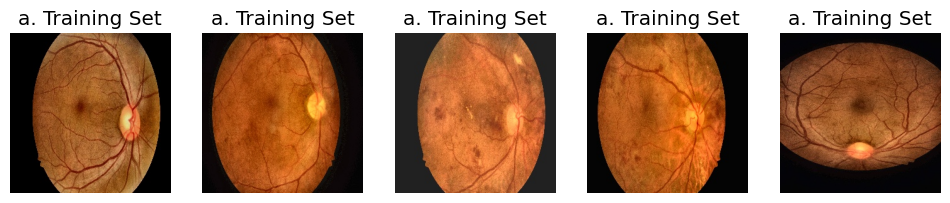

⚠️ No images found in /content/preprocessed_idrid/augmented/augmented
📌 Showing samples from category: b. Testing Set


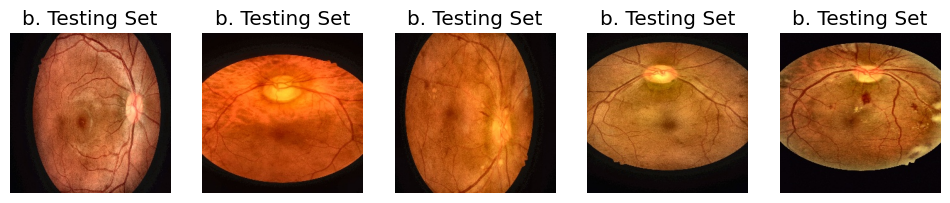

In [64]:
def show_sample_images(folder_path, num_samples=5):
    """Displays a few sample augmented images."""
    categories = os.listdir(folder_path)  # Get categories

    for category in categories:
        category_path = os.path.join(folder_path, category)
        images = [img for img in os.listdir(category_path) if img.endswith(".jpg")]

        if len(images) == 0:
            print(f"⚠️ No images found in {category_path}")
            continue

        print(f"📌 Showing samples from category: {category}")

        plt.figure(figsize=(12, 5))
        for i in range(min(num_samples, len(images))):
            img_path = os.path.join(category_path, images[i])
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB

            plt.subplot(1, num_samples, i+1)
            plt.imshow(img)
            plt.title(category)
            plt.axis("off")

        plt.show()

# Display sample images
show_sample_images(AUGMENTED_DIR_IDRID, num_samples=5)


In [66]:
import os
import cv2
import gzip
import shutil
import numpy as np
from tqdm import tqdm
from glob import glob

# Define paths
STARE_RAW_PATH = "/content/STARE"
SAVE_PATH = "/content/preprocessed_stare"

# Create directories for saving NumPy arrays
os.makedirs(f"{SAVE_PATH}/images", exist_ok=True)
os.makedirs(f"{SAVE_PATH}/labels-ah", exist_ok=True)
os.makedirs(f"{SAVE_PATH}/labels-vk", exist_ok=True)

# Function to extract .ppm.gz files
def extract_gz_files(input_dir):
    """Extracts all .ppm.gz files in a directory."""
    for file_path in glob(os.path.join(input_dir, "*.gz")):
        output_path = file_path.replace(".gz", "")
        with gzip.open(file_path, 'rb') as f_in, open(output_path, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

# Function to convert .ppm to NumPy and save
def convert_and_save_ppm_to_npy(input_dir, output_dir, is_mask=False):
    """Converts .ppm files to NumPy array, resizes, normalizes, and saves them."""
    for ppm_file in tqdm(glob(os.path.join(input_dir, "*.ppm")), desc=f"Processing {input_dir}"):
        img = cv2.imread(ppm_file, cv2.IMREAD_UNCHANGED)
        if img is None:
            print(f"⚠️ Skipping corrupt file: {ppm_file}")
            continue

        # Resize to 512x512
        img = cv2.resize(img, (512, 512), interpolation=cv2.INTER_AREA)

        # Convert masks to grayscale only if they are not already single-channel
        if is_mask and len(img.shape) == 3:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Normalize (convert to float32)
        img = img.astype(np.float32) / 255.0

        # Save as .npy
        filename = os.path.basename(ppm_file).replace(".ppm", ".npy")
        np.save(os.path.join(output_dir, filename), img)

# Step 1: Extract .ppm.gz files
extract_gz_files(f"{STARE_RAW_PATH}/images")
extract_gz_files(f"{STARE_RAW_PATH}/labels_ah")
extract_gz_files(f"{STARE_RAW_PATH}/labels_vk")

# Step 2: Convert .ppm to .npy with normalization
convert_and_save_ppm_to_npy(f"{STARE_RAW_PATH}/images", f"{SAVE_PATH}/images", is_mask=False)
convert_and_save_ppm_to_npy(f"{STARE_RAW_PATH}/labels_ah", f"{SAVE_PATH}/labels-ah", is_mask=True)
convert_and_save_ppm_to_npy(f"{STARE_RAW_PATH}/labels_vk", f"{SAVE_PATH}/labels-vk", is_mask=True)

print(f"✅ STARE Preprocessing Complete! NumPy arrays saved in {SAVE_PATH}")


Processing /content/STARE/labels_vk: 100%|██████████| 20/20 [00:00<00:00, 70.06it/s]

✅ STARE Preprocessing Complete! NumPy arrays saved in /content/preprocessed_stare


In [69]:
import os

STARE_IMAGE_DIR = "/content/preprocessed_stare/images"
STARE_MASK_DIR_AH = "/content/preprocessed_stare/labels-ah"
STARE_MASK_DIR_VK = "/content/preprocessed_stare/labels-vk"

print("📂 Available Images:", os.listdir(STARE_IMAGE_DIR)[:5])  # Show first 5 images
print("📂 Available Masks (AH):", os.listdir(STARE_MASK_DIR_AH)[:5])  # Show first 5 masks
print("📂 Available Masks (VK):", os.listdir(STARE_MASK_DIR_VK)[:5])  # Show first 5 masks


📂 Available Images: ['im0255.npy', 'im0077.npy', 'im0239.npy', 'im0004.npy', 'im0001.npy']
📂 Available Masks (AH): ['im0005.ah.npy', 'im0004.ah.npy', 'im0239.ah.npy', 'im0082.ah.npy', 'im0255.ah.npy']
📂 Available Masks (VK): ['im0240.vk.npy', 'im0139.vk.npy', 'im0319.vk.npy', 'im0324.vk.npy', 'im0004.vk.npy']


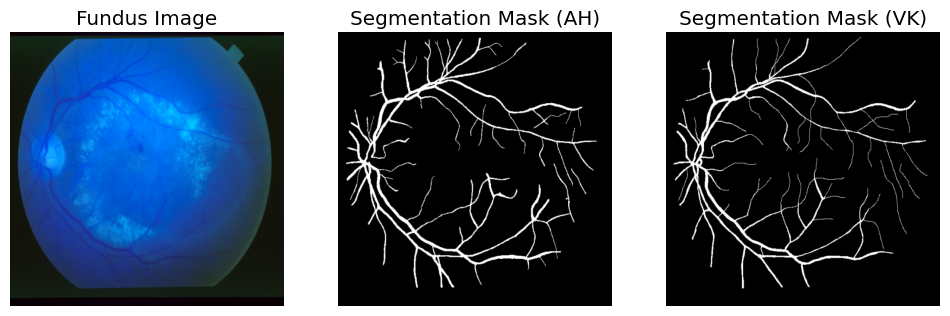

In [70]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Pick a random file
random_filename = random.choice(os.listdir(STARE_IMAGE_DIR))  # e.g., "im0004.npy"

# Define correct paths
sample_image_path = os.path.join(STARE_IMAGE_DIR, random_filename)
sample_mask_path_ah = os.path.join(STARE_MASK_DIR_AH, random_filename.replace(".npy", ".ah.npy"))
sample_mask_path_vk = os.path.join(STARE_MASK_DIR_VK, random_filename.replace(".npy", ".vk.npy"))

# Check if files exist
if os.path.exists(sample_image_path) and os.path.exists(sample_mask_path_ah):
    X_stare = np.load(sample_image_path)
    y_stare_ah = np.load(sample_mask_path_ah)
    y_stare_vk = np.load(sample_mask_path_vk) if os.path.exists(sample_mask_path_vk) else None

    # Plot the image & mask
    plt.figure(figsize=(12, 5))

    # Fundus Image
    plt.subplot(1, 3, 1)
    plt.imshow(X_stare, cmap="gray")
    plt.title("Fundus Image")
    plt.axis("off")

    # Segmentation Mask (AH)
    plt.subplot(1, 3, 2)
    plt.imshow(y_stare_ah, cmap="gray")
    plt.title("Segmentation Mask (AH)")
    plt.axis("off")

    # Segmentation Mask (VK) - Optional
    if y_stare_vk is not None:
        plt.subplot(1, 3, 3)
        plt.imshow(y_stare_vk, cmap="gray")
        plt.title("Segmentation Mask (VK)")
        plt.axis("off")

    plt.show()

else:
    print(f"❌ Sample STARE image or mask not found. Paths checked:")
    print(f"🔹 Image: {sample_image_path}")
    print(f"🔹 Mask AH: {sample_mask_path_ah}")
    print(f"🔹 Mask VK: {sample_mask_path_vk} (optional)")


In [71]:
!pip install albumentations  # Install if not installed
import os
import numpy as np
import cv2
import albumentations as A
from albumentations.pytorch import ToTensorV2
from tqdm import tqdm


In [72]:
# Define augmentation pipeline for STARE
augment = A.Compose([
    A.HorizontalFlip(p=0.5),      # Flip left-right
    A.VerticalFlip(p=0.5),        # Flip top-bottom
    A.ElasticTransform(p=0.2),    # Apply slight warping
    A.GaussianBlur(p=0.2),        # Apply blur for domain adaptation
])


In [73]:
# Define directories
PREPROCESSED_DIR = "/content/preprocessed_stare"
AUGMENTED_DIR = "/content/preprocessed_stare/augmented"

# Create separate folders for augmented images & masks
os.makedirs(f"{AUGMENTED_DIR}/images", exist_ok=True)
os.makedirs(f"{AUGMENTED_DIR}/masks-ah", exist_ok=True)
os.makedirs(f"{AUGMENTED_DIR}/masks-vk", exist_ok=True)

def augment_and_save_images(preprocessed_dir, save_dir):
    """Applies augmentations to preprocessed STARE images & masks, saves as .jpg"""

    # List all fundus images
    image_files = sorted(os.listdir(f"{preprocessed_dir}/images"))

    for image_file in tqdm(image_files, desc="Augmenting STARE Images"):
        # Define corresponding mask filenames
        mask_ah_file = image_file.replace(".npy", ".ah.npy")
        mask_vk_file = image_file.replace(".npy", ".vk.npy")

        # Load fundus image & masks
        img_path = os.path.join(preprocessed_dir, "images", image_file)
        mask_ah_path = os.path.join(preprocessed_dir, "labels-ah", mask_ah_file)
        mask_vk_path = os.path.join(preprocessed_dir, "labels-vk", mask_vk_file)

        if not os.path.exists(img_path) or not os.path.exists(mask_ah_path):
            print(f"❌ Skipping {image_file} (Image or Mask missing)")
            continue

        img = np.load(img_path)
        mask_ah = np.load(mask_ah_path)
        mask_vk = np.load(mask_vk_path) if os.path.exists(mask_vk_path) else None  # VK mask optional

        # Convert from normalized format [0,1] to [0,255]
        img_uint8 = (img * 255).astype(np.uint8)
        mask_ah_uint8 = (mask_ah * 255).astype(np.uint8)
        mask_vk_uint8 = (mask_vk * 255).astype(np.uint8) if mask_vk is not None else None

        # Apply augmentation to both image & masks
        augmented = augment(image=img_uint8, mask=mask_ah_uint8)
        aug_img = augmented["image"]
        aug_mask_ah = augmented["mask"]

        if mask_vk is not None:
            aug_mask_vk = augment(image=img_uint8, mask=mask_vk_uint8)["mask"]
        else:
            aug_mask_vk = None

        # Save augmented files
        save_img_path = os.path.join(save_dir, "images", f"aug_{image_file.replace('.npy', '.jpg')}")
        save_mask_ah_path = os.path.join(save_dir, "masks-ah", f"aug_{mask_ah_file.replace('.npy', '.jpg')}")
        save_mask_vk_path = os.path.join(save_dir, "masks-vk", f"aug_{mask_vk_file.replace('.npy', '.jpg')}") if mask_vk is not None else None

        cv2.imwrite(save_img_path, aug_img)
        cv2.imwrite(save_mask_ah_path, aug_mask_ah)

        if aug_mask_vk is not None:
            cv2.imwrite(save_mask_vk_path, aug_mask_vk)

    print(f"✅ Augmented images & masks saved in {save_dir}")

# Run augmentation for STARE
augment_and_save_images(PREPROCESSED_DIR, AUGMENTED_DIR)
print("✅ STARE Data Augmentation Complete! Augmented images & masks saved separately as .jpg")


Augmenting STARE Images: 100%|██████████| 20/20 [00:02<00:00,  9.90it/s]

✅ Augmented images & masks saved in /content/preprocessed_stare/augmented
✅ STARE Data Augmentation Complete! Augmented images & masks saved separately as .jpg


In [74]:
import os

# Define paths
AUGMENTED_DIR = "/content/preprocessed_stare/augmented"

# Count files in each augmented folder
img_count = len(os.listdir(f"{AUGMENTED_DIR}/images"))
mask_ah_count = len(os.listdir(f"{AUGMENTED_DIR}/masks-ah"))
mask_vk_count = len(os.listdir(f"{AUGMENTED_DIR}/masks-vk")) if os.path.exists(f"{AUGMENTED_DIR}/masks-vk") else 0

# Print file counts
print(f"📂 Augmented Fundus Images: {img_count}")
print(f"📂 Augmented AH Masks: {mask_ah_count}")
print(f"📂 Augmented VK Masks: {mask_vk_count} (if available)")

# List a few sample files from each folder
print("\n📌 Sample Augmented Files:")
print("Images:", os.listdir(f"{AUGMENTED_DIR}/images")[:5])
print("AH Masks:", os.listdir(f"{AUGMENTED_DIR}/masks-ah")[:5])
print("VK Masks:", os.listdir(f"{AUGMENTED_DIR}/masks-vk")[:5] if mask_vk_count > 0 else "No VK masks found")


📂 Augmented Fundus Images: 20
📂 Augmented AH Masks: 20
📂 Augmented VK Masks: 20 (if available)

📌 Sample Augmented Files:
Images: ['aug_im0236.jpg', 'aug_im0044.jpg', 'aug_im0162.jpg', 'aug_im0002.jpg', 'aug_im0003.jpg']
AH Masks: ['aug_im0240.ah.jpg', 'aug_im0001.ah.jpg', 'aug_im0004.ah.jpg', 'aug_im0139.ah.jpg', 'aug_im0002.ah.jpg']
VK Masks: ['aug_im0240.vk.jpg', 'aug_im0082.vk.jpg', 'aug_im0139.vk.jpg', 'aug_im0002.vk.jpg', 'aug_im0005.vk.jpg']


In [75]:
import os
import cv2
import matplotlib.pyplot as plt

# Define paths to augmented images & masks
AUGMENTED_DIR = "/content/preprocessed_stare/augmented"
IMG_DIR = f"{AUGMENTED_DIR}/images"
MASK_AH_DIR = f"{AUGMENTED_DIR}/masks-ah"
MASK_VK_DIR = f"{AUGMENTED_DIR}/masks-vk"


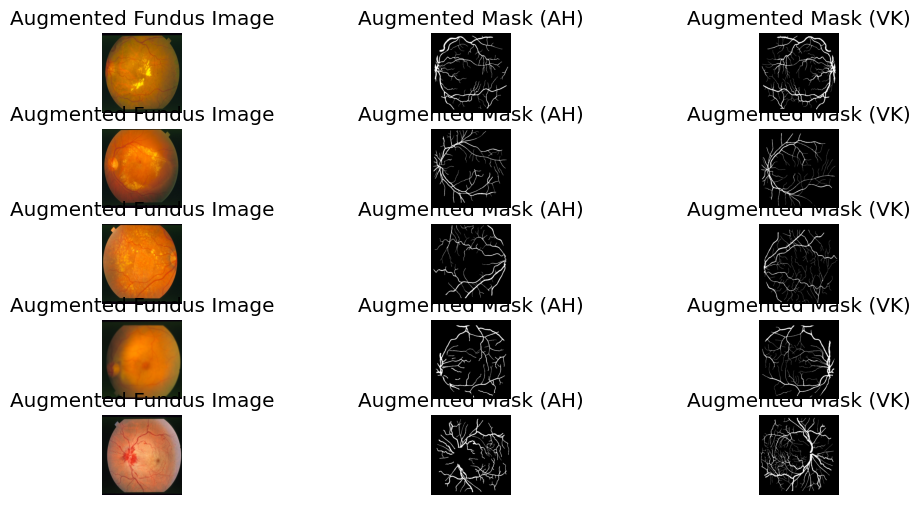

In [76]:
def show_augmented_samples(num_samples=5):
    """Displays augmented fundus images with corresponding segmentation masks."""
    img_files = sorted(os.listdir(IMG_DIR))[:num_samples]  # Get first N images

    plt.figure(figsize=(12, 6))

    for i, img_file in enumerate(img_files):
        img_path = os.path.join(IMG_DIR, img_file)
        mask_ah_path = os.path.join(MASK_AH_DIR, img_file.replace(".jpg", ".ah.jpg"))
        mask_vk_path = os.path.join(MASK_VK_DIR, img_file.replace(".jpg", ".vk.jpg"))

        # Read images
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        mask_ah = cv2.imread(mask_ah_path, cv2.IMREAD_GRAYSCALE)
        mask_vk = cv2.imread(mask_vk_path, cv2.IMREAD_GRAYSCALE) if os.path.exists(mask_vk_path) else None

        # Plot Fundus Image
        plt.subplot(num_samples, 3, i * 3 + 1)
        plt.imshow(img)
        plt.title("Augmented Fundus Image")
        plt.axis("off")

        # Plot Segmentation Mask (AH)
        plt.subplot(num_samples, 3, i * 3 + 2)
        plt.imshow(mask_ah, cmap="gray")
        plt.title("Augmented Mask (AH)")
        plt.axis("off")

        # Plot Segmentation Mask (VK) if available
        if mask_vk is not None:
            plt.subplot(num_samples, 3, i * 3 + 3)
            plt.imshow(mask_vk, cmap="gray")
            plt.title("Augmented Mask (VK)")
            plt.axis("off")

    plt.show()

# Show sample augmented images & masks
show_augmented_samples(num_samples=5)


In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm

IMG_SIZE = (512, 512)   # Define target image size

def preprocess_vessel_image(image_path):
    """Reads a vessel segmentation image, converts to grayscale, resizes, and normalizes."""
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
    if img is None:
        print(f"⚠️ Skipping corrupt image: {image_path}")
        return None

    img = cv2.resize(img, IMG_SIZE)  # Resize
    img = img / 255.0  # Normalize
    return img

def preprocess_vessel_dataset(directory):
    """Preprocesses vessel segmentation datasets."""
    images = []
    filenames = []

    for img_name in tqdm(os.listdir(directory), desc=f"Processing {directory}"):
        img_path = os.path.join(directory, img_name)
        img = preprocess_vessel_image(img_path)
        if img is not None:
            images.append(img)
            filenames.append(img_name)

    return np.array(images), filenames

# Process STARE dataset
STARE_PATH = "/content/STARE/converted_png"
X_stare, y_stare = preprocess_vessel_dataset(STARE_PATH)
print(f"✅ STARE Preprocessing Complete! Shape: {X_stare.shape}")

# Process DRIVE dataset
DRIVE_PATH = "/content/DRIVE/test/images"  # Update path as needed
X_drive, y_drive = preprocess_vessel_dataset(DRIVE_PATH)
print(f"✅ DRIVE Preprocessing Complete! Shape: {X_drive.shape}")


Processing /content/STARE/converted_png: 100%|██████████| 60/60 [00:01<00:00, 55.09it/s]


✅ STARE Preprocessing Complete! Shape: (60, 512, 512)


Processing /content/DRIVE/test/images: 100%|██████████| 20/20 [00:00<00:00, 43.04it/s]

✅ DRIVE Preprocessing Complete! Shape: (20, 512, 512)


In [ ]:
# Define save paths
SAVE_DIR = "/content/preprocessed_vessel"
os.makedirs(SAVE_DIR, exist_ok=True)

# Save STARE dataset
np.save(os.path.join(SAVE_DIR, "X_stare.npy"), X_stare)
np.save(os.path.join(SAVE_DIR, "y_stare.npy"), np.array(y_stare))

# Save DRIVE dataset
np.save(os.path.join(SAVE_DIR, "X_drive.npy"), X_drive)
np.save(os.path.join(SAVE_DIR, "y_drive.npy"), np.array(y_drive))

print(f"✅ Preprocessed STARE & DRIVE datasets saved in {SAVE_DIR}!")


✅ Preprocessed STARE & DRIVE datasets saved in /content/preprocessed_vessel!


In [ ]:
import os

# Define paths
image_dir = "/content/STARE/converted_png/"
ah_mask_dir = "/content/STARE/labels-ah/"
vk_mask_dir = "/content/STARE/labels-vk/"

# List files (removing extensions for comparison)
image_files = set(f.replace('.png', '') for f in os.listdir(image_dir) if f.endswith('.png'))
ah_mask_files = set(f.replace('.ah.png', '') for f in os.listdir(ah_mask_dir) if f.endswith('.ah.png'))
vk_mask_files = set(f.replace('.vk.png', '') for f in os.listdir(vk_mask_dir) if f.endswith('.vk.png'))

# Find missing masks
missing_ah = image_files - ah_mask_files
missing_vk = image_files - vk_mask_files

print(f"🔹 Total Images: {len(image_files)}")
print(f"🔹 Total AH Masks: {len(ah_mask_files)}")
print(f"🔹 Total VK Masks: {len(vk_mask_files)}")

print(f"⚠️ Missing AH masks for: {missing_ah}")
print(f"⚠️ Missing VK masks for: {missing_vk}")


FileNotFoundError: [Errno 2] No such file or directory: '/content/STARE/labels-ah/'